# Fine-tuning YOLOv8 on KITTI
For proper dir structure please reffer to section "Generate proper dir structure and labels!" in kitti_playground notebook.

In [8]:
from ultralytics import YOLO
import os
from IPython import display

# pretrained model

In [11]:
def generate_results(model: YOLO, images: list[str], out: str = "."):

    for idx, f in enumerate(images):
        results = model([f])

        # Process results list
        for result in results:
            boxes = result.boxes  # Boxes object for bounding box outputs
            masks = result.masks  # Masks object for segmentation masks outputs
            keypoints = result.keypoints  # Keypoints object for pose outputs
            probs = result.probs  # Probs object for classification outputs
            obb = result.obb  # Oriented boxes object for OBB outputs
            #result.show()  # display to screen
            filename = f"{out}/result_{idx}.jpg"
            result.save(filename=filename)  # save to disk


In [ ]:
model_pretrained = YOLO("yolov8n.pt")

test_set = ["data/KITTI/images/val/" + file for file in os.listdir("data/KITTI/images/val/")][:10]

generate_results(model_pretrained, test_set, "pretrained/")



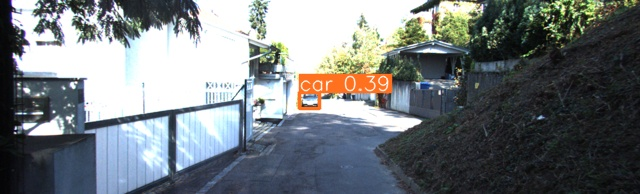

In [15]:
id = 4
display.Image(f"results/pretrained/result_{id}.jpg")

# fine tuning

In [40]:
model = YOLO("yolov8n.pt")  # load a pretrained model (recommended for training)

results = model.train(data="configs/kitti_train_config.yml", epochs=10, imgsz=640)

Ultralytics YOLOv8.2.29 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=config.yml, epochs=10, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train4, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, show_boxes=True, lin

train: Scanning /content/data/labels/train.cache... 5985 images, 0 backgrounds, 0 corrupt: 100%|██████████| 5985/5985 [00:00<?, ?it/s]

albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))



/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
val: Scanning /content/data/labels/val.cache... 1496 images, 0 backgrounds, 0 corrupt: 100%|██████████| 1496/1496 [00:00<?, ?it/s]


Plotting labels to runs/detect/train4/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000833, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/train4
Starting training for 10 epochs...
Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/10      2.59G      1.414      1.971      1.114          2        640: 100%|██████████| 375/375 [02:32<00:00,  2.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  32%|███▏      | 15/47 [00:04<00:08,  3.88it/s]

WARNING ⚠️ NMS time limit 3.600s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 47/47 [00:32<00:00,  1.44it/s]


                   all       1496       8138      0.522      0.344      0.348      0.198

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/10      2.36G      1.291      1.285      1.073         12        640: 100%|██████████| 375/375 [02:20<00:00,  2.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 47/47 [00:12<00:00,  3.76it/s]


                   all       1496       8138      0.485      0.456      0.436      0.253

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/10      2.36G      1.232      1.089      1.052          3        640: 100%|██████████| 375/375 [02:19<00:00,  2.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 47/47 [00:15<00:00,  3.00it/s]


                   all       1496       8138      0.623      0.444      0.478      0.275

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/10      2.33G      1.187     0.9679      1.039          1        640: 100%|██████████| 375/375 [02:18<00:00,  2.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 47/47 [00:16<00:00,  2.85it/s]

                   all       1496       8138      0.567      0.516      0.521      0.312



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/10      2.35G      1.143     0.8841      1.021          5        640: 100%|██████████| 375/375 [02:18<00:00,  2.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 47/47 [00:16<00:00,  2.79it/s]

                   all       1496       8138      0.662      0.508      0.579      0.352



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/10      2.35G      1.103     0.8188      1.007          4        640: 100%|██████████| 375/375 [02:19<00:00,  2.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 47/47 [00:16<00:00,  2.82it/s]

                   all       1496       8138      0.706      0.523      0.602      0.364



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/10      2.35G      1.069     0.7665     0.9944          4        640: 100%|██████████| 375/375 [02:18<00:00,  2.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 47/47 [00:15<00:00,  2.98it/s]

                   all       1496       8138      0.727      0.552      0.638      0.399



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/10      2.35G      1.028     0.7254     0.9775          2        640: 100%|██████████| 375/375 [02:23<00:00,  2.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 47/47 [00:12<00:00,  3.85it/s]

                   all       1496       8138      0.754      0.583      0.672      0.425



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/10      2.36G      1.004     0.6926     0.9676          1        640: 100%|██████████| 375/375 [02:18<00:00,  2.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 47/47 [00:12<00:00,  3.85it/s]

                   all       1496       8138      0.759      0.608      0.691      0.443



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/10      2.37G     0.9722     0.6599     0.9564          3        640: 100%|██████████| 375/375 [02:19<00:00,  2.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 47/47 [00:13<00:00,  3.60it/s]


                   all       1496       8138      0.796      0.596      0.706      0.454

10 epochs completed in 0.441 hours.
Optimizer stripped from runs/detect/train4/weights/last.pt, 6.2MB
Optimizer stripped from runs/detect/train4/weights/best.pt, 6.2MB

Validating runs/detect/train4/weights/best.pt...
Ultralytics YOLOv8.2.29 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3007208 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 47/47 [00:18<00:00,  2.50it/s]


                   all       1496       8138      0.796      0.596      0.706      0.454
                   car       1338       5770      0.916      0.791      0.907      0.679
               cyclist        242        350      0.885      0.484      0.671      0.355
            pedestrian        362        933       0.82      0.538      0.679      0.351
        person_sitting         18         42      0.556      0.357      0.451      0.239
                 truck        192        203      0.815      0.783      0.844      0.623
                   van        415        548      0.857      0.599       0.75      0.546
                  tram         70         99      0.763      0.779      0.799      0.482
                  misc        145        193      0.755       0.44      0.545      0.361
Speed: 0.1ms preprocess, 1.4ms inference, 0.0ms loss, 2.4ms postprocess per image
Results saved to runs/detect/train4


In [ ]:
loaded_model = YOLO("runs/detect/train/train4/weights/best.pt")
generate_results(loaded_model, test_set, "finetuned/")

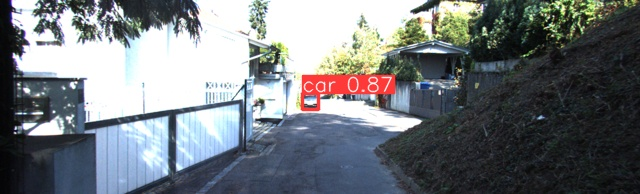

In [17]:
id = 4
display.Image(f"results/finetuned/result_{id}.jpg")